In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

In [4]:
df = pd.read_csv("student-por 2.csv")

In [5]:
df.shape

(649, 33)

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
print(df.isnull().sum().sum())

0


In [9]:
object_col=[col for col in df.columns if df[col].dtype=="object"]

In [10]:
def remove_outlier(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower = Q1-1.5*IQR
  upper=Q3+1.5*IQR
  df_celan=df[(df[column]>=lower) & (df[column]<=upper)]
  return df_celan
    
df_copy=df.copy()
print(df_copy["G3"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 649 entries, 0 to 648
Series name: G3
Non-Null Count  Dtype
--------------  -----
649 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB
None


In [11]:
df_copy=remove_outlier(df_copy,"G3")

In [12]:
print(df_copy["G3"].info())

<class 'pandas.core.series.Series'>
Index: 633 entries, 0 to 648
Series name: G3
Non-Null Count  Dtype
--------------  -----
633 non-null    int64
dtypes: int64(1)
memory usage: 9.9 KB
None


In [13]:
l_encoder=LabelEncoder()
for col in object_col:
    df_copy[col]=l_encoder.fit_transform(df_copy[col])

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      633 non-null    int64
 1   sex         633 non-null    int64
 2   age         633 non-null    int64
 3   address     633 non-null    int64
 4   famsize     633 non-null    int64
 5   Pstatus     633 non-null    int64
 6   Medu        633 non-null    int64
 7   Fedu        633 non-null    int64
 8   Mjob        633 non-null    int64
 9   Fjob        633 non-null    int64
 10  reason      633 non-null    int64
 11  guardian    633 non-null    int64
 12  traveltime  633 non-null    int64
 13  studytime   633 non-null    int64
 14  failures    633 non-null    int64
 15  schoolsup   633 non-null    int64
 16  famsup      633 non-null    int64
 17  paid        633 non-null    int64
 18  activities  633 non-null    int64
 19  nursery     633 non-null    int64
 20  higher      633 non-null    int64
 21

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      633 non-null    int64
 1   sex         633 non-null    int64
 2   age         633 non-null    int64
 3   address     633 non-null    int64
 4   famsize     633 non-null    int64
 5   Pstatus     633 non-null    int64
 6   Medu        633 non-null    int64
 7   Fedu        633 non-null    int64
 8   Mjob        633 non-null    int64
 9   Fjob        633 non-null    int64
 10  reason      633 non-null    int64
 11  guardian    633 non-null    int64
 12  traveltime  633 non-null    int64
 13  studytime   633 non-null    int64
 14  failures    633 non-null    int64
 15  schoolsup   633 non-null    int64
 16  famsup      633 non-null    int64
 17  paid        633 non-null    int64
 18  activities  633 non-null    int64
 19  nursery     633 non-null    int64
 20  higher      633 non-null    int64
 21

In [16]:
corr=df.corr(numeric_only=True)
corr["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

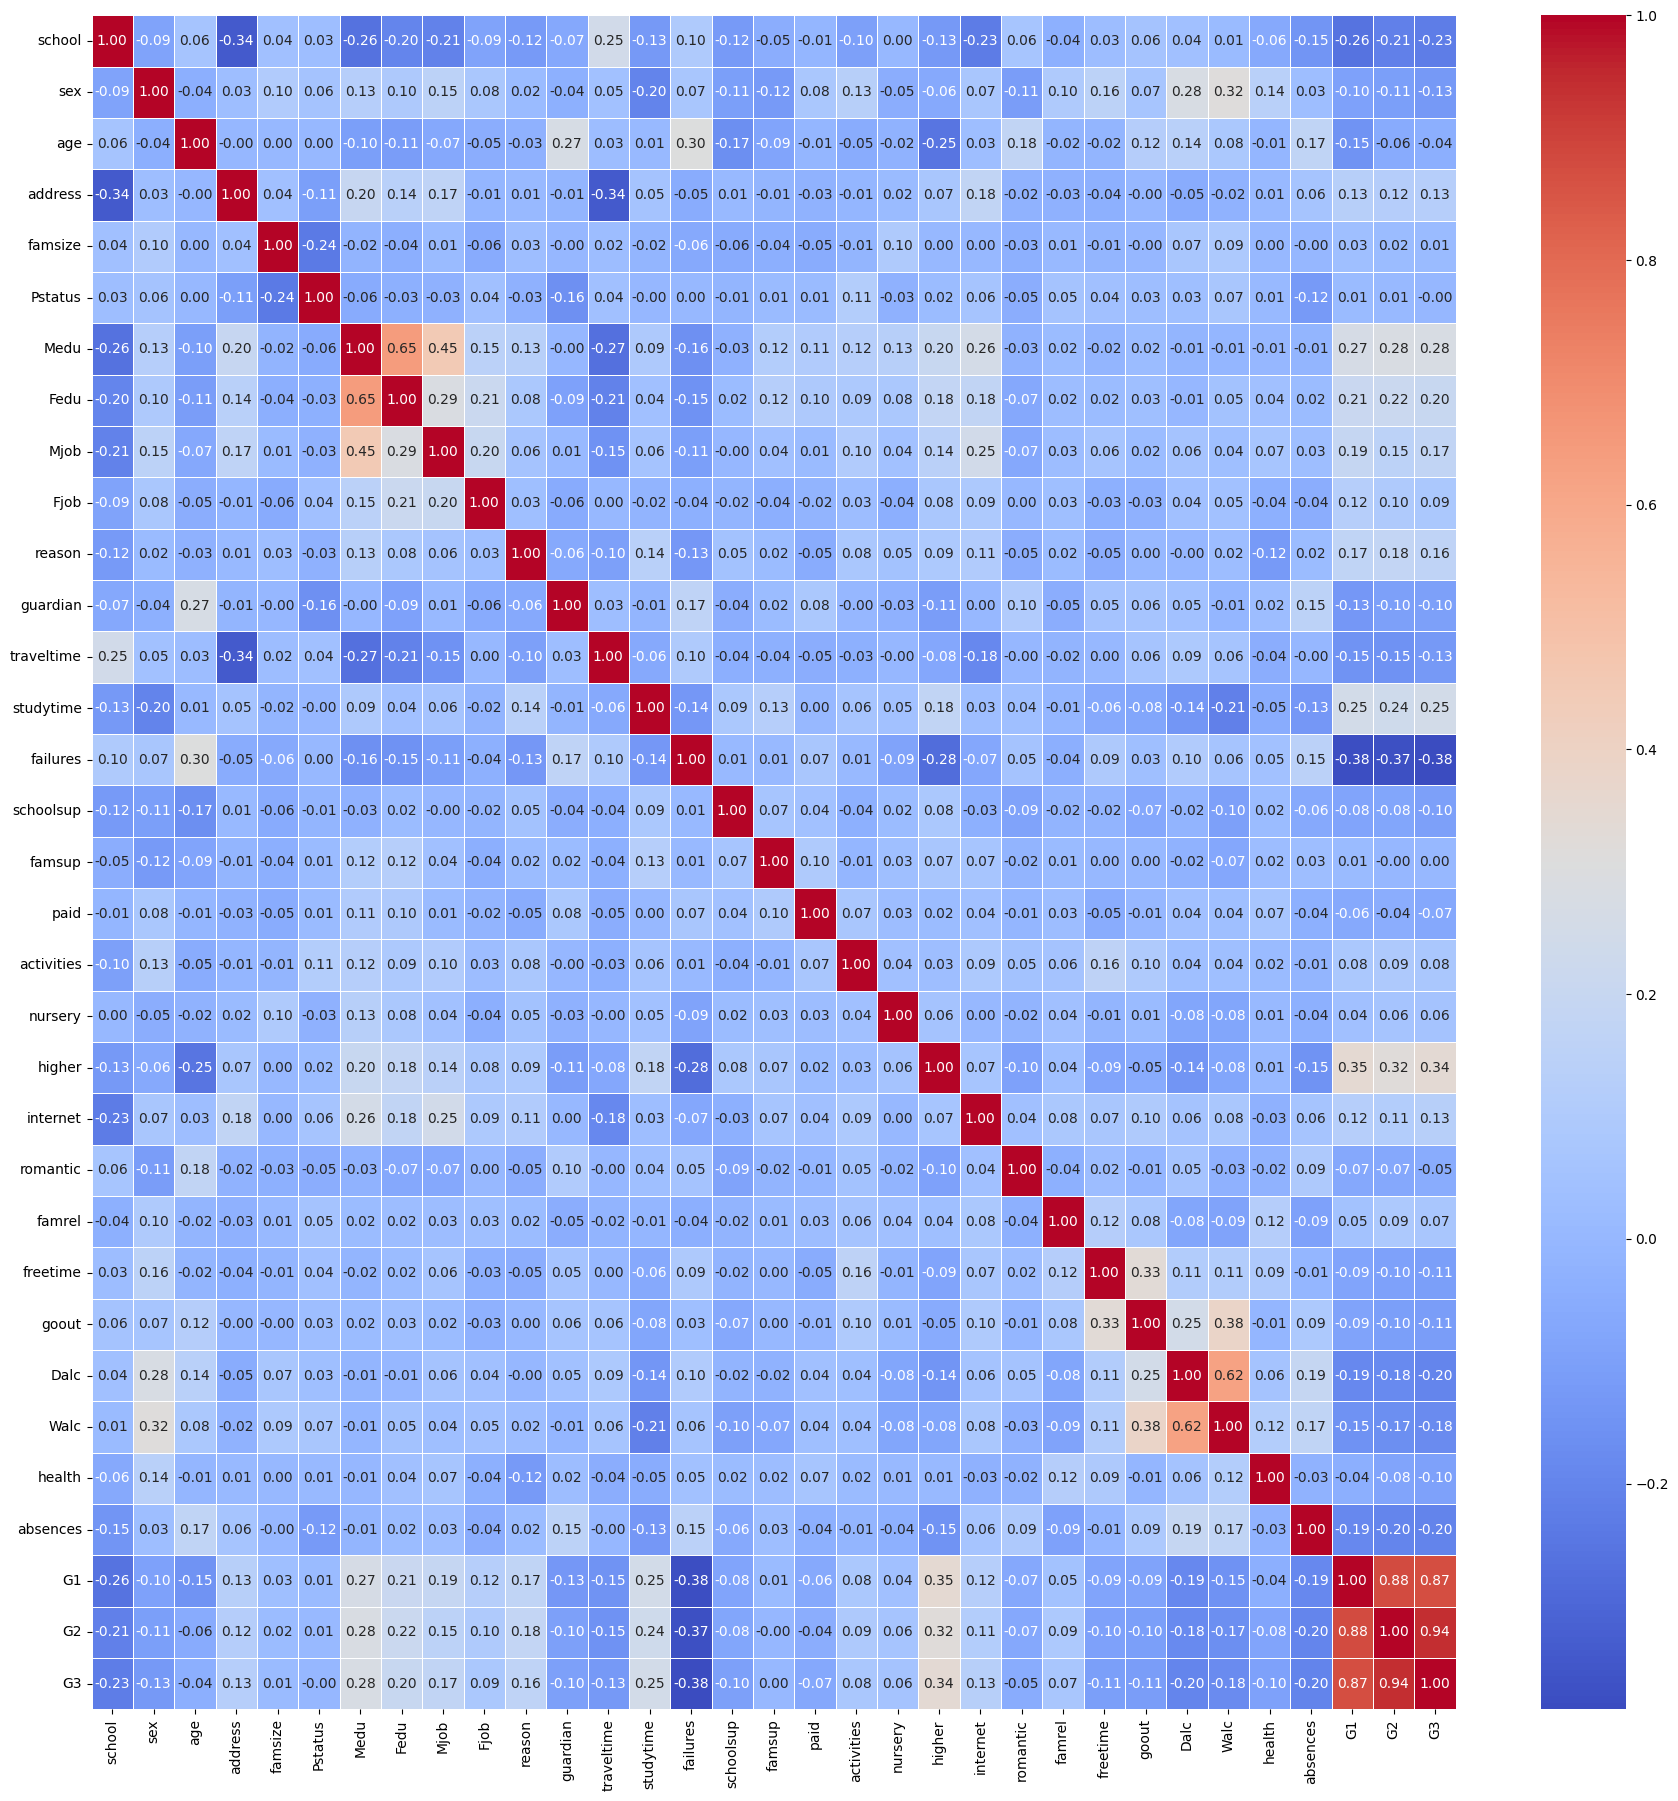

In [17]:
plt.figure(figsize=(22,22))
sns.heatmap(df_copy.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.7)
plt.show()

<Axes: xlabel='G3', ylabel='Density'>

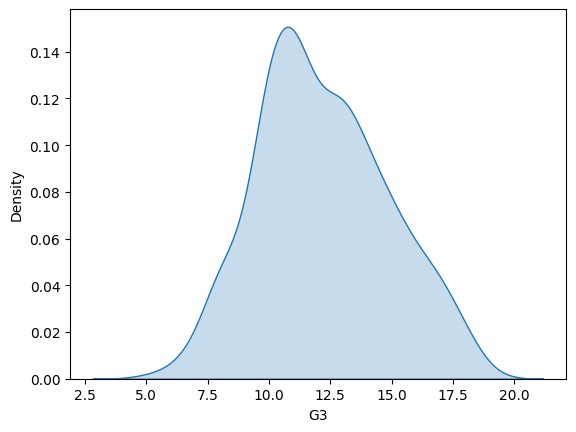

In [18]:
sns.kdeplot(df_copy["G3"],fill=True)

<Axes: ylabel='G3'>

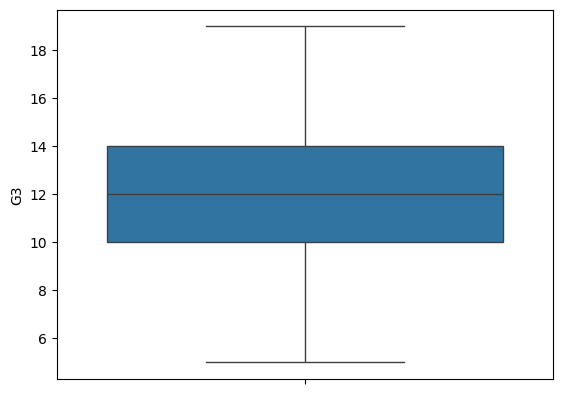

In [23]:
sns.boxplot(df_copy["G3"],fill=True)

In [25]:
df_copy["G2_binary"] = np.where(df_copy["G2"] >= 10, 1, 0)   # veya >=60
X = df_copy.drop(columns=["G3", "G2"])  
y = df_copy["G3"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=df_copy["school"])

In [21]:
li_reg=LinearRegression()
li_reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score,root_mean_squared_error


y_score = li_reg.predict(X_test)


mae  = mean_absolute_error(y_test, y_score)
mse  = mean_squared_error(y_test, y_score)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_score)
mape = (np.abs((y_test - y_score) / np.where(y_test == 0, 1e-9, y_test))).mean() * 100
medae = median_absolute_error(y_test, y_score)
evs  = explained_variance_score(y_test, y_score)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)


print("-" * 45)
print(f"MAE   : {mae:.4f}")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")
print(f"Adj R²: {adj_r2:.4f}")
print(f"MAPE  : {mape:.2f}%")
print(f"MedAE : {medae:.4f}")
print(f"EVS   : {evs:.4f}")
print("-" * 45)




---------------------------------------------
MAE   : 0.8857
MSE   : 1.2531
RMSE  : 1.1194
R²    : 0.8137
Adj R²: 0.7503
MAPE  : 7.37%
MedAE : 0.6714
EVS   : 0.8157
---------------------------------------------
